In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,robust_scale,PolynomialFeatures,OneHotEncoder,LabelBinarizer
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import eli5
from scipy.stats import norm
%matplotlib inline
sns.set(style='white')
sns.set_palette('deep')
import os

In [2]:
df = pd.read_csv("../A21_python_labs/data/books.csv",sep=',',error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
#length of data 
len(df)

11123

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


<AxesSubplot:>

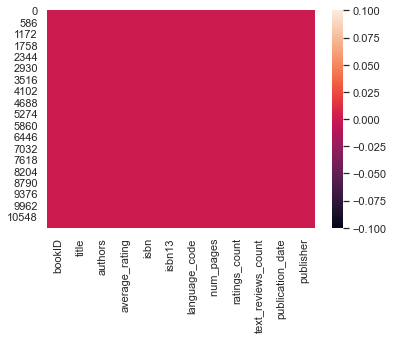

In [5]:
#checking the null value 

#df.isnull().any()
print(df.isnull().sum())
sns.heatmap(df.isnull())

In [6]:
df.describe(include='all')

bookID      title       authors  average_rating        isbn  \
count   11123.000000      11123         11123    11123.000000       11123   
unique           NaN      10348          6639             NaN       11123   
top              NaN  The Iliad  Stephen King             NaN  0968303188   
freq             NaN          9            40             NaN           1   
mean    21310.856963        NaN           NaN        3.934075         NaN   
std     13094.727252        NaN           NaN        0.350485         NaN   
min         1.000000        NaN           NaN        0.000000         NaN   
25%     10277.500000        NaN           NaN        3.770000         NaN   
50%     20287.000000        NaN           NaN        3.960000         NaN   
75%     32104.500000        NaN           NaN        4.140000         NaN   
max     45641.000000        NaN           NaN        5.000000         NaN   

              isbn13 language_code     num_pages  ratings_count  \
count   1.112300e+04         11123  11123.000000   1.112300e+04   
unique           NaN            27           NaN            NaN   
top              NaN           eng           NaN            NaN   
freq             NaN          8908           NaN            NaN   
mean    9.759880e+12           NaN    336.405556   1.794285e+04   
std     4.429758e+11           NaN    241.152626   1.124992e+05   
min     8.987060e+09           NaN      0.000000   0.000000e+00   
25%     9.780345e+12           NaN    192.000000   1.040000e+02   
50%     9.780582e+12           NaN    299.000000   7.450000e+02   
75%     9.780872e+12           NaN    416.000000   5.000500e+03   
max     9.790008e+12           NaN   6576.000000   4.597666e+06   

        text_reviews_count publication_date publisher  
count         11123.000000            11123     11123  
unique                 NaN             3679      2290  
top                    NaN        10/1/2005   Vintage  
freq                   NaN               56       318  
mean            542.048099              NaN       NaN  
std            2576.619589              NaN       NaN  
min               0.000000              NaN       NaN  
25%               9.000000              NaN       NaN  
50%              47.000000              NaN       NaN  
75%             238.000000              NaN       NaN  
max           94265.000000              NaN       NaN

In [7]:
profile = ProfileReport(df)
profile